Diego Yael Islas Santoyo

27/10/2024

# A11-Integración Montecarlo

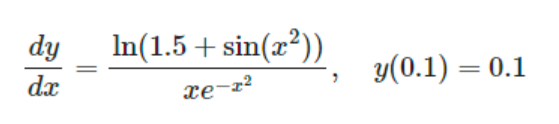

y(x) es la acumulación de todos sus cambios instantáneos.

a) Integra los siguientes intervalos utilizando 1 millón de muestras. Escribe los resultados en un DataFrame de pandas.

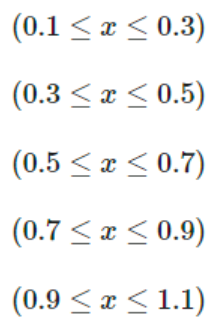

b) Usa el teorema fundamental del cálculo para escribir la secuencia de valores para y(x):

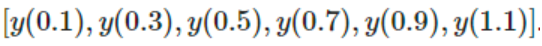


Toma en cuenta que 

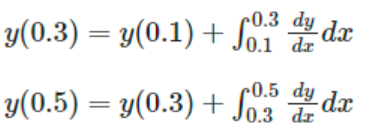

y así sucesivamente.

In [12]:
import numpy as np
import pandas as pd
def ec1(x):
    return (np.log(1.5 + np.sin(x**2))/ x * np.exp(-x**2))

In [14]:
def montecarlo_tipo1(f, a, b, n):
    u = np.random.uniform(a, b, n) 
    return np.mean(f(u)) * (b - a)  

x_valores = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]
y0 = 0.1  
n = 1000000  

y_valor = [y0]


for i in range(len(x_valores) - 1):
    a = x_valores[i]        
    b = x_valores[i + 1]    

    integral = montecarlo_tipo1(ec1, a, b, n)

    y2 = y_valor[-1] + integral
    y_valor.append(y2)

df_resultados = pd.DataFrame({
    'x': x_valores,
    'y(x)': y_valor
})

print(df_resultados)


     x      y(x)
0  0.1  0.100000
1  0.3  0.554563
2  0.5  0.774390
3  0.7  0.918715
4  0.9  1.016748
5  1.1  1.079690


In [16]:

for i in range(len(x_valores) - 1):
    a = x_valores[i]        # Límite inferior
    b = x_valores[i + 1]    # Límite superior

    integral = montecarlo_tipo1(ec1, a, b, n)

    y2 = y_valor[-1] + integral
    y_valor.append(y2)

for i in range(len(x_valores)):
    x = x_valores[i]
    y = y_valor[i]
    print("x =", x, "y =", y)


x = 0.1 y = 0.1
x = 0.3 y = 0.5545630926252736
x = 0.5 y = 0.7743904988848259
x = 0.7 y = 0.9187154411712009
x = 0.9 y = 1.0167484802174567
x = 1.1 y = 1.0796902886771447


2.- Dadas superficies en el espacio 

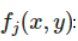

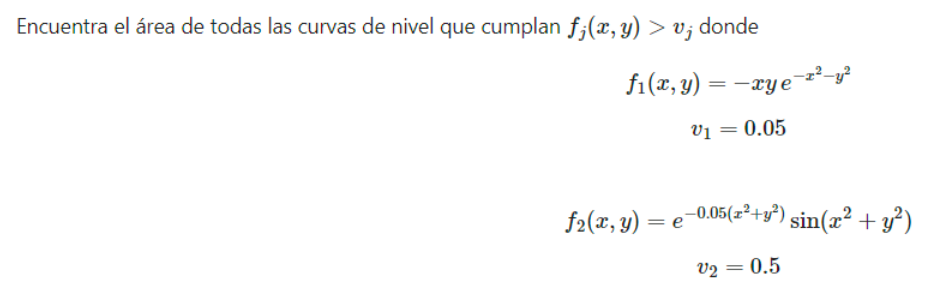

a) Encuentra los límites de integración que encierren el área deseada y grafica.

In [18]:
def func_1(x,y):
    return (-x)*y*np.exp(-x**2-y**2) > 0.05

def func_2(x,y):
    return np.exp(-0.05*(x**2+y**2))*np.sin(x**2 + y**2) > 0.5

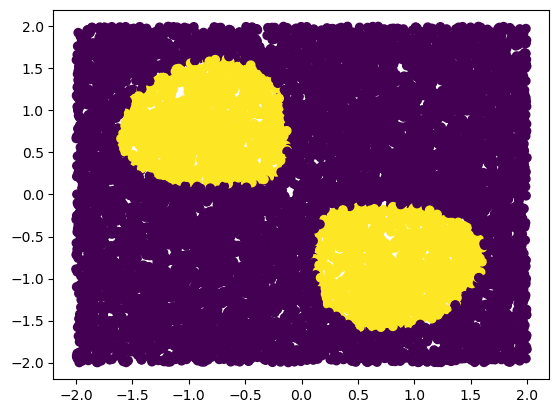

In [23]:
ax = -2
bx = 2
ay = -2
by = 2
n = 10000
x = np.random.uniform(ax, bx, n)
y = np.random.uniform(ay, by, n)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y, c = func_1(x,y))

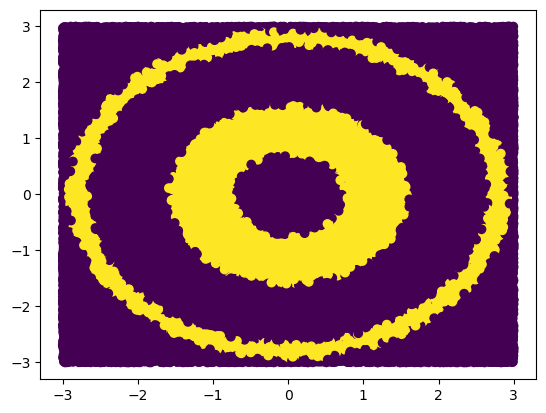

In [22]:
ax2 = -3
bx2 = 3
ay2 = -3
by2 = 3
n = 100000
x = np.random.uniform(ax2, bx2, n)
y = np.random.uniform(ay2, by2, n)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y, c = func_2(x,y))


b) Estima los valores de las áreas usando:

+ 10,000 puntos

+ 100,000 puntos

+ 1'000,000 puntos

Escribe tus resultados en un DataFrame de pandas.

In [38]:
def montecarlo_tipo2(func_1, ax, bx, ay, by, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    AR = (bx - ax)*(by - ay)
    return func_1(x, y).mean()*AR

import pandas as pd  

tabla2 = pd.DataFrame(columns=["funcion", "n", "Área"])
tabla2.loc[1, "funcion"] = "funcion1"
tabla2.loc[1, "n"] = "10,000"
tabla2.loc[1, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 10000) 

tabla2.loc[2, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 100000) 
tabla2.loc[2, "funcion"] = "funcion1"
tabla2.loc[2, "n"] = "100,000"

tabla2.loc[3, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 1000000) 
tabla2.loc[3, "funcion"] = "funcion1"
tabla2.loc[3, "n"] = "1000000"

tabla2.loc[4, "Área"] = montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 10000) 
tabla2.loc[4, "funcion"] = "funcion2"
tabla2.loc[4, "n"] = "10000"

tabla2.loc[5, "Área"] = montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 100000) 
tabla2.loc[5, "funcion"] = "funcion2"
tabla2.loc[5, "n"] = "100000"

tabla2.loc[6, "Área"] = montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 1000000) 
tabla2.loc[6, "funcion"] = "funcion2"
tabla2.loc[6, "n"] = "1000000"


tabla2



,funcion,n,Área
1,funcion1,"10,000",3.728
2,funcion1,"100,000",3.67104
3,funcion1,1000000,3.677504
4,funcion2,10000,11.052
5,funcion2,100000,10.83528
6,funcion2,1000000,10.895256


c) Aproxima el error relativo para cada una de tus estimaciones.

In [40]:
AR1 = (bx-ax) * (by-ay) 
AR2 = (bx2-ax2)*(by2-ay2)

Crel_fun1_1 = np.sqrt((1- montecarlo_tipo2(func_1, ax, bx, ay, by, 10000)/AR1)/(montecarlo_tipo2(func_1, ax, bx, ay, by, 10000)/AR1))
Crel_fun1_2 = np.sqrt((1- montecarlo_tipo2(func_1, ax, bx, ay, by, 100000)/AR1)/(montecarlo_tipo2(func_1, ax, bx, ay, by, 100000)/AR1))
Crel_fun1_3 = np.sqrt((1- montecarlo_tipo2(func_1, ax, bx, ay, by, 1000000)/AR1)/(montecarlo_tipo2(func_1, ax, bx, ay, by, 1000000)/AR1))

Erel_fun1_1 = np.log10(Crel_fun1_1) - np.log10(10000)/2
Erel_fun1_2 = np.log10(Crel_fun1_2) - np.log10(100000)/2
Erel_fun1_3 = np.log10(Crel_fun1_3) - np.log10(1000000)/2

Crel_fun2_1 = np.sqrt((1- montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 10000)/AR2)/(montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 10000)/AR2))
Crel_fun2_2 = np.sqrt((1- montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 100000)/AR2)/(montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 100000)/AR2))
Crel_fun2_3 = np.sqrt((1- montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 1000000)/AR2)/(montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 1000000)/AR2))

Erel_fun2_1 = np.log10(Crel_fun2_1) - np.log10(10000)/2
Erel_fun2_2 = np.log10(Crel_fun2_2) - np.log10(100000)/2
Erel_fun2_3 = np.log10(Crel_fun2_3) - np.log10(1000000)/2

Erel_fun1_1, Erel_fun1_2, Erel_fun1_3, Erel_fun2_1, Erel_fun2_2, Erel_fun2_3 

(-1.7360914120410202,
 -2.2368368982216977,
 -2.7379283292659817,
 -1.8196830565526456,
 -2.319006533315878,
 -2.8189285011208707)

In [42]:
tabla3 = pd.DataFrame(columns=["funcion", "n", "Área","Error relativo aprox"])
tabla3.loc[1, "funcion"] = "funcion1"
tabla3.loc[1, "n"] = "10,000"
tabla3.loc[1, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 10000) 
tabla3.loc[1, "Error relativo aprox"] = Erel_fun1_1

tabla3.loc[2, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 100000) 
tabla3.loc[2, "funcion"] = "funcion1"
tabla3.loc[2, "n"] = "100,000"
tabla3.loc[2, "Error relativo aprox"] = Erel_fun1_2

tabla3.loc[3, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 1000000) 
tabla3.loc[3, "funcion"] = "funcion1"
tabla3.loc[3, "n"] = "1000000"
tabla3.loc[3, "Error relativo aprox"] = Erel_fun1_3

tabla3.loc[4, "Área"] = montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 10000) 
tabla3.loc[4, "funcion"] = "funcion2"
tabla3.loc[4, "n"] = "10000"
tabla3.loc[4, "Error relativo aprox"] = Erel_fun2_1

tabla3.loc[5, "Área"] = montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 100000) 
tabla3.loc[5, "funcion"] = "funcion2"
tabla3.loc[5, "n"] = "100000"
tabla3.loc[5, "Error relativo aprox"] = Erel_fun2_2 


tabla3.loc[6, "Área"] = montecarlo_tipo2(func_2, ax2, bx2, ay2, by2, 1000000) 
tabla3.loc[6, "funcion"] = "funcion2"
tabla3.loc[6, "n"] = "1000000"
tabla3.loc[6, "Error relativo aprox"] = Erel_fun2_3


tabla3

,funcion,n,Área,Error relativo aprox
1,funcion1,"10,000",3.6144,-1.736091
2,funcion1,"100,000",3.67616,-2.236837
3,funcion1,1000000,3.672832,-2.737928
4,funcion2,10000,10.908,-1.819683
5,funcion2,100000,10.78128,-2.319007
6,funcion2,1000000,10.913364,-2.818929
